<a href="https://colab.research.google.com/github/anhphuong012/TieuLuan/blob/main/Dataset_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện cần thiết
import numpy as np
import pandas as pd
import os
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


**Tải tập dữ liệu**



In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

**Tiền xử lí dữ liệu**

In [ ]:
# Chuẩn hóa dữ liệu


x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

#Convert dữ liệu dạng vector sang binary (One hot coding)
num_classes=10
y_train_encoded=to_categorical(y_train,num_classes)
y_test_encoded=to_categorical(y_test,num_classes)



In [ ]:
X_train_reshaped= x_train.reshape(x_train.shape[0],-1)
X_test_reshaped=x_test.reshape(x_test.shape[0], -1)


y_train_convert = y_train.flatten()
y_test_convert = y_test.flatten()

X_train_reshaped.shape,X_test_reshaped.shape

((50000, 3072), (10000, 3072))

**Trực quan hóa dữ liệu**

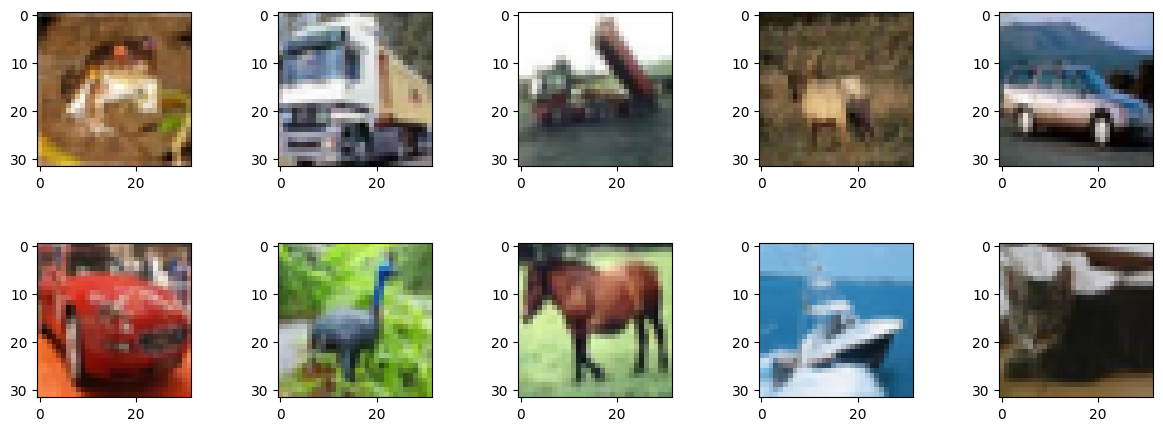

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i])

plt.subplots_adjust(hspace=0.5)
plt.show()

**Huấn huyện mô hình với KNN, RandomForest, DecisionTree**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors' : [5,10,12],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean']

}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy",refit=True,return_train_score=True)


grid_search.fit(X_train_reshaped,y_train_convert)
y_pre = grid_search.predict(X_test_reshaped)



print(grid_search.best_params_)
accuracy_knm = accuracy_score(y_test_convert,y_pre)
pre_knm =precision_score(y_test_convert,y_pre,average="macro")
recall_knm = recall_score(y_test_convert,y_pre,average="macro")
f1_knm = f1_score(y_test_convert,y_pre,average="macro")

print("Accuracy:" + str(accuracy_knm))
print("Precision:" +str(pre_knm ))
print("Recall:" + str(recall_knm))
print("F1:" + str(f1_knm))

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy:0.3567
Precision:0.43848004563385323
Recall:0.3567
F1:0.34655690131002953


In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [6,9,11],
     'criterion' :['gini', 'entropy']
}
random = RandomForestClassifier()
grid_search = GridSearchCV(estimator=random,param_grid=param_grid,scoring="accuracy",refit=True,return_train_score=True)

grid_search.fit(X_train_reshaped,y_train_convert)
y_pre = grid_search.predict(X_test_reshaped)

print(grid_search.best_params_)
accuracy_rd = accuracy_score(y_test_convert,y_pre)
pre_rd =precision_score(y_test_convert,y_pre,average="micro")
recall_rd = recall_score(y_test_convert,y_pre,average="macro")
f1_rd = f1_score(y_test_convert,y_pre,average="macro")

print("Accuracy:" + str(accuracy_rd))
print("Precision:" +str(pre_rd ))
print("Recall:" + str(recall_rd))
print("F1:" + str(f1_rd))

{'criterion': 'gini', 'max_depth': 11}
Accuracy:0.4356
Precision:0.4356
Recall:0.4356
F1:0.4266844384255172


In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': [ 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, 0.001,0.0001],
              'max_depth' : [ 15, 17, 19 ,21],
              'min_samples_split':[2,4,5],
              'criterion' :['gini', 'entropy'],
              'max_leaf_nodes': [5, 10, None]
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_reshaped, y_train_convert)

y_pre = grid_search.predict(X_test_reshaped)


print(grid_search.best_params_)
accuracy_desion = accuracy_score(y_test_convert,y_pre)
pre_desion =precision_score(y_test_convert,y_pre,average="macro")
recall_desion = recall_score(y_test_convert,y_pre,average="macro")
f1_desion = f1_score(y_test_convert,y_pre,average="micro")

print("Accuracy:" + str(accuracy_desion))
print("Precision:" +str(pre_desion ))
print("Recall:" + str(recall_desion))
print("F1:" + str(f1_desion))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
{'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_split': 4}
Accuracy:0.311
Precision:0.31007178077756137
Recall:0.31099999999999994
F1:0.311


**Tải mô hình VGG16 áp dụng Fine tune**

In [ ]:
from tensorflow import keras
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Input


image_input = tf.keras.layers.Input(shape=(32,32, 3))

#Tạo mô hình cơ sở VGG-16 với trọng số imagenet
baseModel_VGG_16 = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_tensor=image_input)



# Đóng băng các lớp cơ sở
for i in baseModel_VGG_16.layers:
    i.trainable=False
# In model summary

# # Tinh chỉnh một số lớp cuối cùng của mô hình VGG16


for layer in baseModel_VGG_16.layers[-5:]:
    layer.trainable = True
baseModel_VGG_16.summary()

# for i in baseModel_VGG_16.layers:
#     i.trainable=True

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

**Mô hình CNN không áp dụng cơ chế chú ý**

In [ ]:
from tensorflow.keras.layers import Attention, GlobalAveragePooling2D,AveragePooling2D






FC_layer_Flatten = tf.keras.layers.Flatten()(baseModel_VGG_16.output)
TOP_FC = tf.keras.layers.Dropout(0.2)(FC_layer_Flatten)
Dense=tf.keras.layers.Dense(units=516,activation='relu', kernel_regularizer=tf.keras.regularizers.l2())(TOP_FC)
Dense=tf.keras.layers.Dense(units=256,activation='relu')(Dense)
Dense = tf.keras.layers.Dropout(0.5)(Dense)
Dense=tf.keras.layers.Dense(units=128,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=64,activation='relu')(Dense)
Dense = tf.keras.layers.Dropout(0.5)(Dense)
Classification=tf.keras.layers.Dense(units=10,activation='softmax')(Dense)
model_final = tf.keras.Model(inputs=image_input,outputs=Classification)

Classification=tf.keras.layers.Dense(units=10,activation='softmax')(Dense)

In [ ]:
model_final_cnn = tf.keras.Model(inputs=image_input,outputs=Classification)

#In  Model Summary
model_final_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:


model_final_cnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#Train mô hình
history = model_final_cnn.fit(x_train,y_train_encoded,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
1407/1407 [==============================] - 41s 23ms/step - loss: 5.7303 - accuracy: 0.3502 - val_loss: 4.1581 - val_accuracy: 0.5778
Epoch 2/10
1407/1407 [==============================] - 28s 20ms/step - loss: 3.5209 - accuracy: 0.5816 - val_loss: 2.8370 - val_accuracy: 0.6188
Epoch 3/10
1407/1407 [==============================] - 25s 17ms/step - loss: 2.3963 - accuracy: 0.6493 - val_loss: 1.9297 - val_accuracy: 0.6796
Epoch 4/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.7548 - accuracy: 0.6790 - val_loss: 1.6545 - val_accuracy: 0.6392
Epoch 5/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.3698 - accuracy: 0.7061 - val_loss: 1.1887 - val_accuracy: 0.7118
Epoch 6/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1332 - accuracy: 0.7251 - val_loss: 1.2879 - val_accuracy: 0.6602
Epoch 7/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.9779 - accuracy: 0.7423 - val_loss: 0.9419 -

In [ ]:
# Dự đoán nhãn cho dữ liệu kiểm định hoặc thử nghiệm
y_pre = model_final_cnn.predict(np.asarray(x_test))
# Chuyển đổi dự đoán từ dạng xác suất  thành nhãn thực tế
Y_pred_classes = tf.argmax(y_pre, axis=1).numpy()

y_test = np.argmax(y_test_encoded, axis=1)
accuracy_cnn = accuracy_score(np.asarray(y_test),Y_pred_classes)
pre_cnn =precision_score(np.asarray(y_test),Y_pred_classes,average="weighted")
recall_cnn = recall_score(np.asarray(y_test),Y_pred_classes,average="weighted")
f1_cnn = f1_score(np.asarray(y_test),Y_pred_classes,average="weighted")

print("Accuracy:" + str(accuracy_cnn))
print("Precision:" +str(pre_cnn ))
print("Recall:" + str(recall_cnn))
print("F1:" + str(f1_cnn))

313/313 [==============================] - 3s 9ms/step
Accuracy:0.7157
Precision:0.7282495761624056
Recall:0.7157
F1:0.7139523536899974


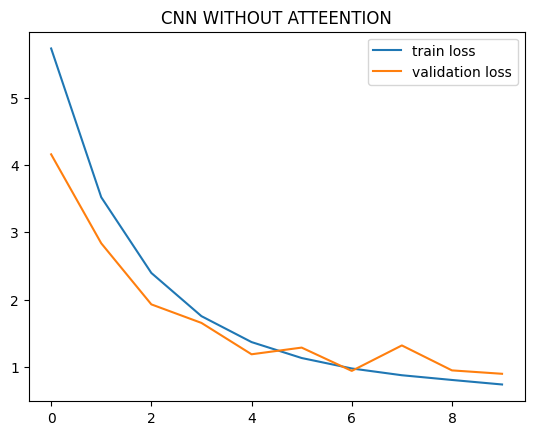

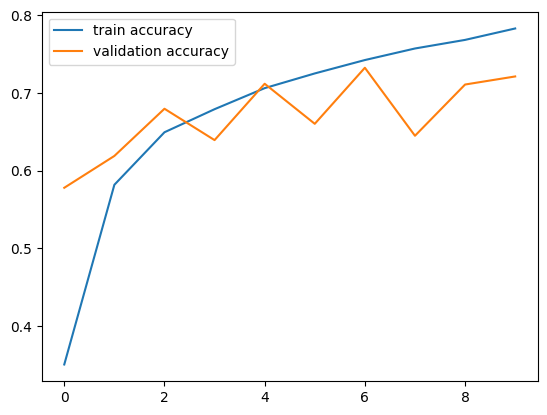

In [ ]:
plt.title('CNN WITHOUT ATTEENTION')
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

plt.show()

**Mô hình CNN kết hợp Attention (CBAM)**

In [ ]:
from tensorflow.keras.layers import Attention, GlobalMaxPooling2D,GlobalAveragePooling2D,AveragePooling2D,AdditiveAttention,Concatenate,MultiHeadAttention, LayerNormalization,Layer, Reshape, multiply, add, Activation, Flatten, Concatenate,Add,Multiply,MaxPooling2D,BatchNormalization, ReLU
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

#Định nghĩa CBAM
def cbam_block(cbam_feature, ratio=8):

    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    channel = input_feature.shape[channel_axis]

    shared_layer_one = Dense(channel // ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=False,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             activation='linear',
                             kernel_initializer='he_normal',
                             use_bias=False,
                             bias_initializer='zeros')

    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    cbam_feature = Activation('sigmoid')(avg_pool + max_pool)

    if K.image_data_format() == "channels_first":
        cbam_feature = Multiply()([input_feature, cbam_feature])
    else:
        cbam_feature = Multiply()([input_feature, cbam_feature])
    return cbam_feature

def spatial_attention(input_feature):
    kernel_size = 7

    if K.image_data_format() == "channels_first":
        channel = input_feature.shape[1]
        cbam_feature = Reshape((channel, input_feature.shape[2], input_feature.shape[3]))(input_feature)
    else:
        channel = input_feature.shape[-1]
        cbam_feature = Reshape((input_feature.shape[1], input_feature.shape[2], channel))(input_feature)

    avg_pool = K.mean(cbam_feature, axis=-1, keepdims=True)
    max_pool = K.max(cbam_feature, axis=-1, keepdims=True)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    cbam_feature = Conv2D(filters=1,
                          kernel_size=kernel_size,
                          strides=1,
                          padding='same',
                          activation='sigmoid',
                          use_bias=False)(concat)

    if K.image_data_format() == "channels_first":
        cbam_feature = Multiply()([input_feature, cbam_feature])
    else:
        cbam_feature = Multiply()([input_feature, cbam_feature])
    return cbam_feature


# x = cbam_block(baseModel_VGG_16.output)
#Thêm CBAM vào mô hình
x = baseModel_VGG_16.get_layer('block3_conv3').output
x = BatchNormalization()(x)
x = ReLU()(x)
x = cbam_block(x,ratio = 2)
x =  baseModel_VGG_16.get_layer('block3_pool')(x)

x = baseModel_VGG_16.get_layer('block4_conv1')(x)
x = baseModel_VGG_16.get_layer('block4_conv2')(x)
x = baseModel_VGG_16.get_layer('block4_conv3')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = cbam_block(x,ratio = 2)
x =  baseModel_VGG_16.get_layer('block4_pool')(x)

x = baseModel_VGG_16.get_layer('block5_conv1')(x)
x = baseModel_VGG_16.get_layer('block5_conv2')(x)
x = baseModel_VGG_16.get_layer('block5_conv3')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = cbam_block(x,ratio = 2)
x = baseModel_VGG_16.get_layer('block5_pool')(x)
FC_layer_Flatten = tf.keras.layers.Flatten()(x)
TOP_FC = tf.keras.layers.Dropout(0.2)(FC_layer_Flatten)
Dense=tf.keras.layers.Dense(units=516,activation='relu', kernel_regularizer=tf.keras.regularizers.l2())(TOP_FC)
Dense=tf.keras.layers.Dense(units=256,activation='relu')(Dense)
Dense = tf.keras.layers.Dropout(0.5)(Dense)
Dense=tf.keras.layers.Dense(units=128,activation='relu')(Dense)
Dense=tf.keras.layers.Dense(units=64,activation='relu')(Dense)
Dense = tf.keras.layers.Dropout(0.5)(Dense)
Classification=tf.keras.layers.Dense(units=10,activation='softmax')(Dense)
model_final = tf.keras.Model(inputs=image_input,outputs=Classification)

Classification=tf.keras.layers.Dense(units=10,activation='softmax')(Dense)
model_final = tf.keras.Model(inputs=image_input,outputs=Classification)


In [ ]:
model_final.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 32, 32, 64)           1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 32, 32, 64)           36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

In [ ]:
model_final.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#Train mô hình
history = model_final.fit(x_train,y_train_encoded,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
1407/1407 [==============================] - 43s 28ms/step - loss: 5.7674 - accuracy: 0.3305 - val_loss: 4.1524 - val_accuracy: 0.5794
Epoch 2/10
1407/1407 [==============================] - 38s 27ms/step - loss: 3.5177 - accuracy: 0.5825 - val_loss: 2.6867 - val_accuracy: 0.6630
Epoch 3/10
1407/1407 [==============================] - 38s 27ms/step - loss: 2.3896 - accuracy: 0.6506 - val_loss: 1.9293 - val_accuracy: 0.6784
Epoch 4/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.7297 - accuracy: 0.6904 - val_loss: 1.5072 - val_accuracy: 0.6912
Epoch 5/10
1407/1407 [==============================] - 39s 28ms/step - loss: 1.3303 - accuracy: 0.7193 - val_loss: 1.3146 - val_accuracy: 0.6902
Epoch 6/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.0856 - accuracy: 0.7420 - val_loss: 1.1154 - val_accuracy: 0.7066
Epoch 7/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.9195 - accuracy: 0.7616 - val_loss: 0.9597 -

In [ ]:
y_pre = model_final.predict(np.asarray(x_test))
# Chuyển đổi dự đoán từ dạng xác suất  thành nhãn thực tế
Y_pred_classes = tf.argmax(y_pre, axis=1).numpy()

y_test = np.argmax(y_test_encoded, axis=1)
accuracy_att = accuracy_score(np.asarray(y_test),Y_pred_classes)
pre_att =precision_score(np.asarray(y_test),Y_pred_classes,average="weighted")
recall_att = recall_score(np.asarray(y_test),Y_pred_classes,average="weighted")
f1_att = f1_score(np.asarray(y_test),Y_pred_classes,average="weighted")

print("Accuracy:" + str(accuracy_att))
print("Precision:" +str(pre_att ))
print("Recall:" + str(recall_att))
print("F1:" + str(f1_att))

313/313 [==============================] - 4s 11ms/step
Accuracy:0.7265
Precision:0.7369916008689676
Recall:0.7265
F1:0.7292464493420077


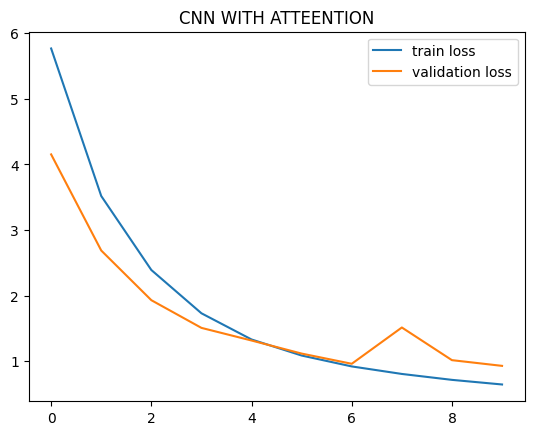

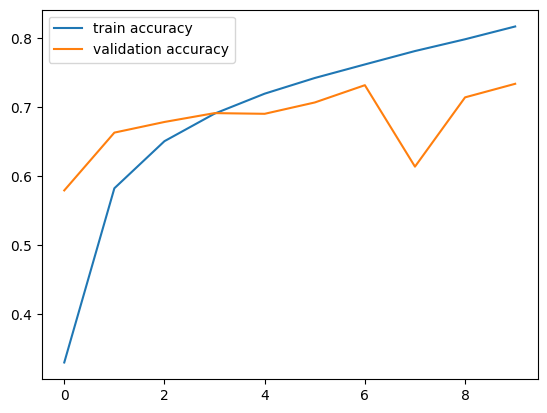

In [ ]:
plt.title('CNN WITH ATTEENTION')
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

plt.show()

**So sánh kết quả**

In [ ]:
from prettytable import PrettyTable

t = PrettyTable(["Algorithms","Accuracy","Precision","Recall","F1"])
t.add_row(['KNN.',round(accuracy_knm,4),round(pre_knm,4),round(recall_knm,4),round(f1_knm,4)])
t.add_row(['RandomForest',round(accuracy_rd,4),round(pre_rd,4),round(recall_rd,4),round(f1_rd,4)])
t.add_row(['DecisionTree',round(accuracy_desion,4),round(pre_desion,4),round(recall_desion,4),round(f1_desion,4)])
t.add_row(['CNN Without Attention',round(accuracy_cnn,4),round(pre_cnn,4),round(recall_cnn,4),round(f1_cnn,4)])
t.add_row(['CNN With Attention',round(accuracy_att,4),round(pre_att,4),round(recall_att,4),round(f1_att,4)])
print(t)

+-----------------------+----------+-----------+--------+--------+
|       Algorithms      | Accuracy | Precision | Recall |   F1   |
+-----------------------+----------+-----------+--------+--------+
|          KNN.         |  0.3567  |   0.4385  | 0.3567 | 0.3466 |
|      RandomForest     |  0.4356  |   0.4356  | 0.4356 | 0.4267 |
|      DecisionTree     |  0.311   |   0.3101  | 0.311  | 0.311  |
| CNN Without Attention |  0.7157  |   0.7282  | 0.7157 | 0.714  |
|   CNN With Attention  |  0.7265  |   0.737   | 0.7265 | 0.7292 |
+-----------------------+----------+-----------+--------+--------+


: